In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('Lionel Messi backs English football_s....jpg')
img.shape # There are 3 dimensions, which are x,y coordinates and BGR value.

(1758, 2637, 3)

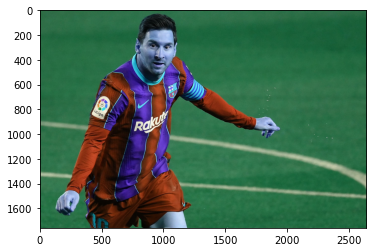

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1758, 2637)

In [5]:
gray

array([[90, 91, 90, ..., 89, 89, 88],
       [90, 90, 89, ..., 88, 87, 87],
       [90, 90, 89, ..., 83, 84, 86],
       ...,
       [86, 87, 88, ..., 80, 79, 79],
       [87, 87, 88, ..., 81, 80, 79],
       [88, 88, 87, ..., 83, 82, 81]], dtype=uint8)

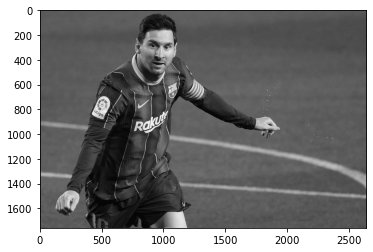

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[789, 157, 355, 355]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h #x,y are xy coordinates where the face starts and 212,212 are the width(w) and height(h) of the faces.

(789, 157, 355, 355)

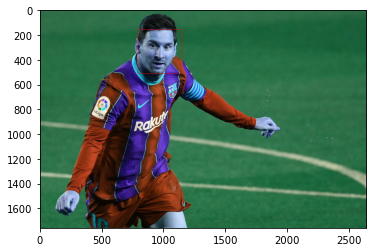

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #RGB: R-255 (red)
plt.imshow(face_img)

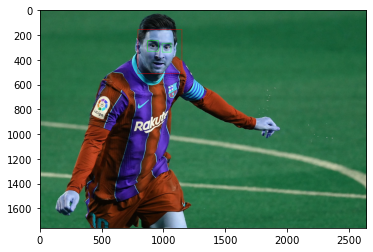

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

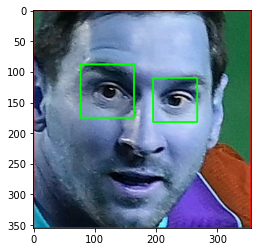

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray') #region of interest

In [12]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

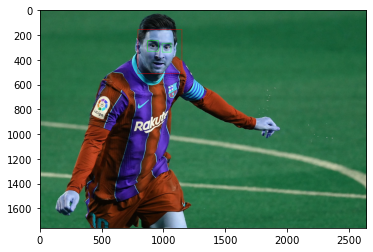

In [13]:
plt.imshow(img)

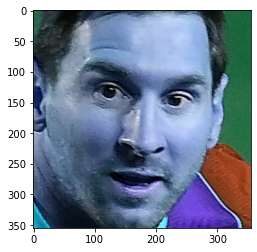

In [14]:
cropped_image = get_cropped_image('Lionel Messi backs English football_s....jpg')
plt.imshow(cropped_image)

In [15]:
path_to_images = "./dataset/"
path_to_cropped_images = "./dataset/cropped_images/"
import os
image_directories = []
for entry in os.scandir(path_to_images):
    if entry.is_dir():
        image_directories.append(entry.path)
image_directories

['./dataset/Harry Kane',
 './dataset/Lionel Messi',
 './dataset/Paulo Dybala',
 './dataset/Kevin De Bruyne',
 './dataset/Phil Foden']

In [16]:
import shutil
if os.path.exists(path_to_cropped_images):
     shutil.rmtree(path_to_cropped_images)
os.mkdir(path_to_cropped_images) #creating cropped_pictures folder

In [17]:
cropped_image_directories = []
footballer_filenames_dict = {}
for image_directory in image_directories:
    count = 1
    footballer_name = image_directory.split('/')[-1]
    footballer_filenames_dict[footballer_name] = []
    for entry in os.scandir(image_directory):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_images + footballer_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_directories.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = footballer_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            footballer_filenames_dict[footballer_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped_images/Harry Kane
Generating cropped images in folder:  ./dataset/cropped_images/Lionel Messi
Generating cropped images in folder:  ./dataset/cropped_images/Paulo Dybala
Generating cropped images in folder:  ./dataset/cropped_images/Kevin De Bruyne
Generating cropped images in folder:  ./dataset/cropped_images/Phil Foden


In [18]:
footballer_filenames_dict

{'Harry Kane': ['./dataset/cropped_images/Harry Kane/Harry Kane1.png',
  './dataset/cropped_images/Harry Kane/Harry Kane2.png',
  './dataset/cropped_images/Harry Kane/Harry Kane3.png',
  './dataset/cropped_images/Harry Kane/Harry Kane4.png',
  './dataset/cropped_images/Harry Kane/Harry Kane5.png',
  './dataset/cropped_images/Harry Kane/Harry Kane6.png',
  './dataset/cropped_images/Harry Kane/Harry Kane7.png',
  './dataset/cropped_images/Harry Kane/Harry Kane8.png',
  './dataset/cropped_images/Harry Kane/Harry Kane9.png',
  './dataset/cropped_images/Harry Kane/Harry Kane10.png',
  './dataset/cropped_images/Harry Kane/Harry Kane11.png',
  './dataset/cropped_images/Harry Kane/Harry Kane12.png',
  './dataset/cropped_images/Harry Kane/Harry Kane13.png',
  './dataset/cropped_images/Harry Kane/Harry Kane14.png',
  './dataset/cropped_images/Harry Kane/Harry Kane15.png',
  './dataset/cropped_images/Harry Kane/Harry Kane16.png',
  './dataset/cropped_images/Harry Kane/Harry Kane17.png',
  './data

In [19]:
class_dict = {}
count = 0
for footballer_name in footballer_filenames_dict.keys():
    class_dict[footballer_name] = count
    count = count + 1
class_dict

{'Harry Kane': 0,
 'Lionel Messi': 1,
 'Paulo Dybala': 2,
 'Kevin De Bruyne': 3,
 'Phil Foden': 4}

In [20]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [21]:
x, y = [], []
for footballer_name, files in footballer_filenames_dict.items(): #files are the lists of each player image
    for image in files:
        img = cv2.imread(image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[footballer_name])

In [22]:
len(x)

218

In [23]:
x

[array([[ 23],
        [ 20],
        [ 20],
        ...,
        [129],
        [ 42],
        [ 38]], dtype=uint8),
 array([[ 58],
        [ 28],
        [ 17],
        ...,
        [189],
        [228],
        [211]], dtype=uint8),
 array([[33],
        [48],
        [66],
        ...,
        [ 0],
        [ 0],
        [ 0]], dtype=uint8),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=uint8),
 array([[138],
        [141],
        [139],
        ...,
        [ 28],
        [ 17],
        [  0]], dtype=uint8),
 array([[ 82],
        [121],
        [ 76],
        ...,
        [207],
        [255],
        [ 39]], dtype=uint8),
 array([[147],
        [134],
        [102],
        ...,
        [241],
        [228],
        [ 11]], dtype=uint8),
 array([[  5],
        [ 23],
        [ 52],
        ...,
        [250],
        [254],
        [  2]], dtype=uint8),
 array([[ 81],
        [ 66],
        [ 67],
        ...,
        [  9],
 

In [24]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [25]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(218, 4096)

In [26]:
from collections import Counter
print(Counter(y).keys())
print(Counter(y).values())

dict_keys([0, 1, 2, 3, 4])
dict_values([50, 47, 43, 30, 48])


In [27]:
len(y)

218

In [28]:
for number in Counter(y).values():
    print(round(number/len(y),2)) #The proprotion is fine, so they are not imbalanced classes.

0.23
0.22
0.2
0.14
0.22


## Model Training

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [31]:
s = StandardScaler()
x_train = s.fit_transform(x_train)

In [32]:
x_test = s.transform(x_test)

In [33]:
x_train

array([[-5.67400026e-01,  1.65034080e-03, -2.07919924e-02, ...,
         9.74909673e-01,  1.05942348e+00,  1.04361624e+00],
       [ 1.06518963e+00,  1.59887080e+00,  2.25474306e+00, ...,
         1.14575032e+00,  1.23970010e+00,  1.45671811e+00],
       [-9.42895648e-01, -1.07437186e+00, -1.02138187e+00, ...,
         1.04134770e+00,  1.12584118e+00, -9.92385818e-01],
       ...,
       [-6.65355405e-01, -6.87676382e-01, -5.69502572e-01, ...,
         1.18371491e+00,  1.28714132e+00,  1.47638963e+00],
       [ 5.10109149e-01,  9.93608307e-01,  1.75444812e+00, ...,
        -1.12263385e+00, -1.02799004e+00, -9.72714301e-01],
       [ 4.12153770e-01,  2.70655891e-01,  2.21286205e-01, ...,
         1.04134770e+00, -1.11338423e+00, -9.92385818e-01]])

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
param_grid = {'C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
              'kernel': ['linear','rbf']}
 
grid_svm = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5)
 
grid_svm.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [35]:
print(grid_svm.best_params_)
print(grid_svm.best_estimator_)

{'C': 0.0005, 'gamma': 0.0001, 'kernel': 'linear'}
SVC(C=0.0005, gamma=0.0001, kernel='linear')


In [37]:
from sklearn.metrics import classification_report

y_pred = grid_svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.83      0.91      0.87        11
           2       0.85      0.79      0.81        14
           3       0.80      1.00      0.89         8
           4       1.00      0.91      0.95        11

    accuracy                           0.87        55
   macro avg       0.88      0.88      0.88        55
weighted avg       0.88      0.87      0.87        55



In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_svm.predict(x_test))
cm

array([[ 9,  1,  0,  1,  0],
       [ 0, 10,  1,  0,  0],
       [ 1,  1, 11,  1,  0],
       [ 0,  0,  0,  8,  0],
       [ 0,  0,  1,  0, 10]])

Text(69.0, 0.5, 'Truth')

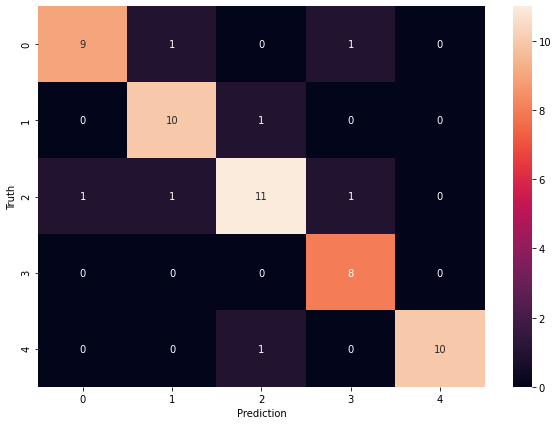

In [39]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
# defining parameter range
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
  
# fitting the model for grid search
grid_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [41]:
print(grid_knn.best_params_)
print(grid_knn.best_estimator_)

{'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4)


In [42]:
y_pred = grid_knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.82      0.58        11
           1       0.50      0.55      0.52        11
           2       0.64      0.50      0.56        14
           3       0.67      0.25      0.36         8
           4       0.89      0.73      0.80        11

    accuracy                           0.58        55
   macro avg       0.63      0.57      0.57        55
weighted avg       0.63      0.58      0.58        55



Text(69.0, 0.5, 'Truth')

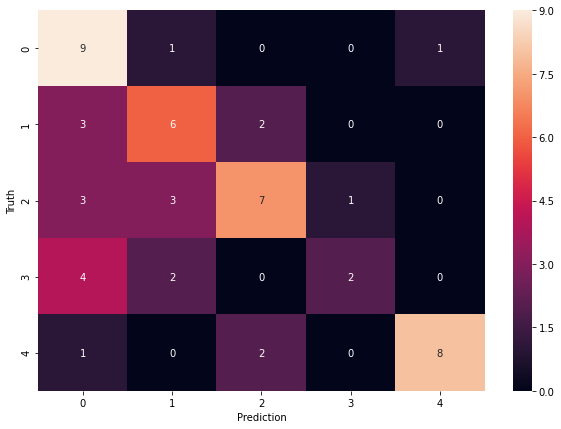

In [43]:
cm = confusion_matrix(y_test, grid_knn.predict(x_test))
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [44]:
from sklearn.linear_model import LogisticRegression
param_grid = {'C': np.logspace(-5, 5, 10), "penalty":["l1","l2"]} # l1 lasso l2 ridge
l=LogisticRegression()
grid_l=GridSearchCV(l,param_grid, scoring='accuracy', cv=5)
grid_l.fit(x_train,y_train)

print(grid_l.best_params_)
print(grid_l.best_estimator_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

{'C': 46.41588833612782, 'penalty': 'l2'}
LogisticRegression(C=46.41588833612782)


In [45]:
y_pred = grid_l.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.83      0.91      0.87        11
           2       0.87      0.93      0.90        14
           3       0.88      0.88      0.88         8
           4       1.00      0.91      0.95        11

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55



Text(69.0, 0.5, 'Truth')

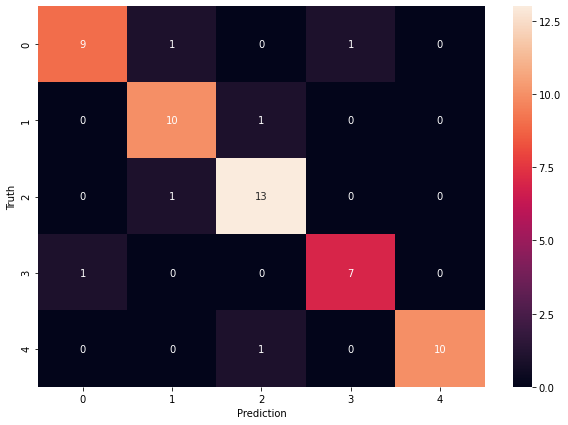

In [46]:
cm = confusion_matrix(y_test, grid_l.predict(x_test))
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [47]:
import pandas as pd
report_svm = classification_report(y_test, grid_svm.predict(x_test), output_dict=True)
report_knn = classification_report(y_test, grid_knn.predict(x_test), output_dict=True)
report_l = classification_report(y_test, grid_l.predict(x_test), output_dict=True)
df1 = pd.DataFrame(report_svm).transpose().drop('support', axis=1)
df2 = pd.DataFrame(report_knn).transpose().drop('support', axis=1)
df3 = pd.DataFrame(report_l).transpose().drop('support', axis=1)

In [48]:
df1 = round(df1.loc['weighted avg',:], 2).to_list()
df2 = round(df2.loc['weighted avg',:], 2).to_list()
df3 = round(df3.loc['weighted avg',:], 2).to_list()

In [49]:
df1 = [ str(x) for x in df1 ]
df1.append('SVM')
df1

['0.88', '0.87', '0.87', 'SVM']

In [50]:
df2 = [ str(x) for x in df2 ]
df2.append('KNN')
df3 = [ str(x) for x in df3 ]
df3.append('LogReg')

In [51]:
data = [df1, df2, df3]
model_selection = pd.DataFrame(data, columns = ['precision', 'recall', 'f1-score', 'Models'])
model_selection

,precision,recall,f1-score,Models
0,0.88,0.87,0.87,SVM
1,0.63,0.58,0.58,KNN
2,0.89,0.89,0.89,LogReg


In [53]:
from sklearn.metrics import accuracy_score
accuracy_list = []
for model in [grid_svm, grid_knn, grid_l]:
    accuracy_list.append(round(accuracy_score(y_test, model.predict(x_test)),2))
accuracy_list

[0.87, 0.58, 0.89]

In [54]:
model_selection['accuracy'] = accuracy_list
model_selection

,precision,recall,f1-score,Models,accuracy
0,0.88,0.87,0.87,SVM,0.87
1,0.63,0.58,0.58,KNN,0.58
2,0.89,0.89,0.89,LogReg,0.89


In [55]:
model_selection.set_index('Models')

,precision,recall,f1-score,accuracy
Models,,,,
SVM,0.88,0.87,0.87,0.87
KNN,0.63,0.58,0.58,0.58
LogReg,0.89,0.89,0.89,0.89


In [56]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(grid_l, 'classification_model.pkl')

['classification_model.pkl']

In [57]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

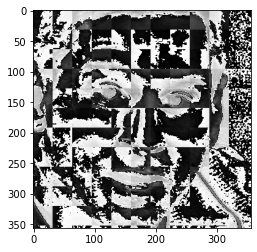

In [58]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

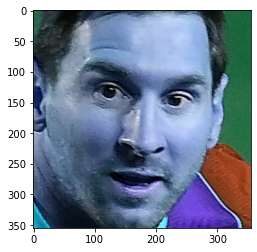

In [59]:
plt.imshow(cropped_image)